# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2383 Борисов Иван Вадимович и Сыздыков Нургалым Конакбаевич. Вариант №8.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.


## Основные теоретические положения

### **1. Единичный цифровой импульс (Дискретная дельта-функция)**

Единичный цифровой импульс $\delta_d(k)$ представляет собой последовательность, которая принимает значение единица при $k=0$ и значение ноль для всех остальных отсчетов.

$$
\delta_d(k) = \begin{cases}
1, & k = 0 \\
0, & k \neq 0
\end{cases}
$$

Эта последовательность является дискретным аналогом аналоговой **дельта-функции Дирака** $\delta(t)$, которая определяется как:

$$
\delta(t) = \begin{cases}
\infty, & t = 0 \\
0, & t \neq 0
\end{cases},
\quad \text{при этом} \quad
\int_{-\infty}^{\infty} \delta(t) dt = 1
$$

Основное различие в том, что $\delta_d(k)$ — это физически реализуемая последовательность с конечной амплитудой, в то время как $\delta(t)$ — это математическая абстракция с бесконечной амплитудой.

### **2. Дискретный единичный скачок (Функция Хевисайда)**

Дискретный единичный скачок $\sigma_d(k)$ представляет собой последовательность, которая равна нулю для отрицательных номеров отсчетов и единице для нулевого и всех положительных номеров отсчетов.

$$
\sigma_d(k) = \begin{cases}
1, & k \ge 0 \\
0, & k < 0
\end{cases}
$$

Эта последовательность является дискретным аналогом **аналоговой функции единичного скачка** $\sigma(t)$.

### **3. Дискретная экспоненциальная функция**

Дискретная экспоненциальная функция $s_1(k)$ определяется как последовательность, значения которой равны степеням некоторого основания $a$. В данной работе рассматривается односторонняя экспонента, равная нулю для $k < 0$.

$$
s_1(k) = \begin{cases}
a^k, & k \ge 0 \\
0, & k < 0
\end{cases}
$$

Поведение этой последовательности зависит от значения $a$:
- Если $|a| > 1$, последовательность возрастает.
- Если $|a| < 1$, последовательность затухает.
- Если $a < 0$, последовательность является знакопеременной (осциллирующей).

### **4. Дискретный комплексный гармонический сигнал**

Это фундаментальный сигнал в ЦОС, описываемый как комплексная экспонента.

$$
s_2(k) = C e^{j\hat{\omega}_0 k}
$$

где $C$ — амплитуда, $\hat{\omega}_0$ — нормированная цифровая частота. При использовании **формулы Эйлера**:

$$
e^{j\phi} = \cos(\phi) + j\sin(\phi)
$$

комплексный сигнал можно разложить на две вещественные последовательности: вещественную и мнимую части.

$$
s_2(k) = C\cos(\hat{\omega}_0 k) + j C\sin(\hat{\omega}_0 k)
$$

### **5. Задержка дискретных сигналов**

Операция задержки сигнала $x(k)$ на $m$ отсчетов записывается как $x(k-m)$. Это означает, что вся последовательность сдвигается вправо по оси времени на $m$ позиций.

- **Задержанный единичный импульс:**
$$
\delta_d(k-m) = \begin{cases}
1, & k = m \\
0, & k \neq m
\end{cases}
$$

- **Задержанный единичный скачок:**
$$
\sigma_d(k-m) = \begin{cases}
1, & k \ge m \\
0, & k < m
\end{cases}
$$

- **Задержанная экспоненциальная функция:**
$$
s_1(k-m) = \begin{cases}
a^{k-m}, & k \ge m \\
0, & k < m
\end{cases}
$$

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Пункты работы выполняется с помощью кода.

# Константы

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

# Номер бригады
Nb = 8

# Длина последовательности
N = 30 + Nb % 5

# Период дискретизации
T = 0.0005 * (1 + Nb % 3)

# Основание экспоненты
a = np.pow(-1, Nb) * (0.8 + 0.005 * (Nb % 20))

# Амплитуда гармонического сигнала
C = 1 + Nb % 5

# Частота гармонического сигнала
w0 = np.pi / (6 + Nb % 5)

# Задержка
m = 5 + Nb % 5

# Дискретное нормированное время
n_vector = np.arange(N)

# Дискретное время
t_vector = n_vector * T

# Функции

In [ ]:
# Функция единичного цифрового импульса
def delta_d(k):
  return 1 if k == 0 else 0

# Функция дискретного единичного скачка
def sigma_d(k):
  return 1 if k >= 0 else 0

# Дискретная экспоненциальная функция
def s1(k):
  return 0 if k < 0 else np.pow(a, k)

# Дискретный комплексный гармонический сигнал
def s2(k):
  return C * cmath.exp(1j * w0 * k)

# Дискретный комплексный гармонический сигнал (Real)
def s2_r(k):
  return C * np.cos(w0 * k)

# Дискретный комплексный гармонический сигнал (Imaginary)
def s2_i(k):
  return C * np.sin(w0 * k)

# Пункт №1

Смоделировать единичный цифровой импульс $\delta_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0,(N−1) \cdot T]$ и дискретного нормированного времени $n \in [0,N−1]$.

Пояснить:

- взаимосвязь между дискретным и дискретным нормированным временем;
- различие между единичным цифровым импульсом и дельта-функцией.

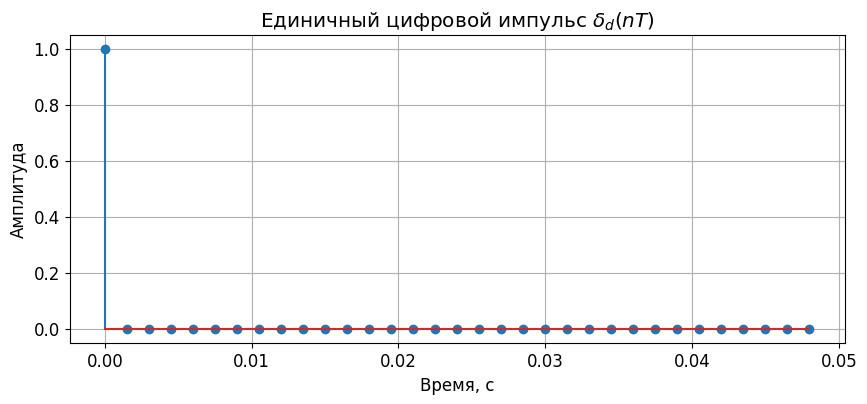

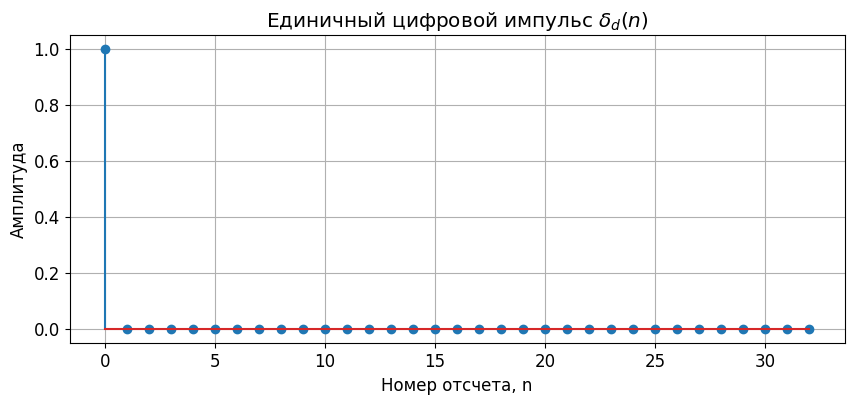

In [ ]:
# Единичный цифровой импульс
delta_signal = [delta_d(num) for num in range(N)]

plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['font.size'] = 12

# Дискретное время
plt.figure()
plt.stem(t_vector, delta_signal)
plt.title(r'Единичный цифровой импульс $\delta_d(nT)$')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

# Дискретное нормированное время
plt.figure()
plt.stem(n_vector, delta_signal)
plt.title(r'Единичный цифровой импульс $\delta_d(n)$')
plt.xlabel('Номер отсчета, n')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

# Пояснение

## Взаимосвязь между дискретным и дискретным нормированным временем

Из построенных графиков видно, что форма единичного импульса на обеих временных шкалах идентична, различаются масштабы горизонтальной оси. Эта взаимосвязь определяется периодом дискретизации $T$.

*   **Дискретное нормированное время ($n$)** — это безразмерная величина, представляющая собой просто целочисленный номер отсчета в последовательности.
В нашей работе $n$ изменяется от 0 до $N-1 = 32$. Эта шкала удобна для математического описания и программирования, так как она не зависит от реальных физических единиц.

*   **Дискретное время ($nT$)** — это физическое время, которое показывает, в какие именно моменты времени (в секундах) были взяты отсчеты аналогового сигнала. Оно рассчитывается путем умножения номера отсчета $n$ на период дискретизации $T$. Для нашего варианта ($T=0.0015$ с) эта шкала изменяется от $0 \cdot 0.0015 = 0$ с до $32 \cdot 0.0015 = 0.048$ с.

Таким образом, связь между ними выражается простой формулой:

$$
t_n = n \cdot T
$$

где $t_n$ — физическое время $n$-го отсчета.

## Различие между единичным цифровым импульсом и дельта-функцией

Единичный цифровой импульс является дискретным аналогом дельта-функции,
однако это разные объекты.

*   **Единичный цифровой импульс $\delta_d(n)$**, — это простая **числовая последовательность**. Его амплитуда конечна и равна 1 в точке $n=0$. Он определен только для целых значений $n$ и является физически реализуемым (его можно сохранить в памяти компьютера и обработать).

*   **Дельта-функция Дирака $\delta(t)$** — это **математическая абстракция** для аналоговых сигналов. Она определена для непрерывного времени $t$ и обладает следующими свойствами: бесконечно малая длительность, бесконечная амплитуда в точке $t=0$ и единичная площадь (интеграл). Дельта-функция физически нереализуема.

# Пункт №2

Смоделировать дискретный единичный скачок $\sigma_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$

Пояснить:
- соответствие между дискретным и аналоговым единичными скачками;
- чему равна частота дискретизации дискретного единичного скачка.

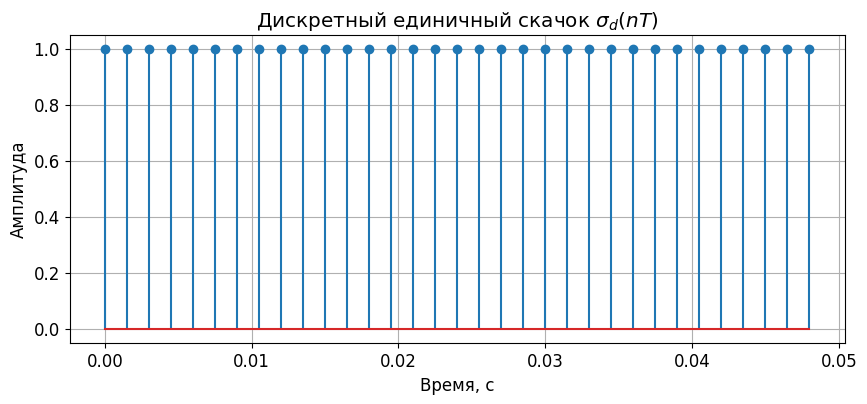

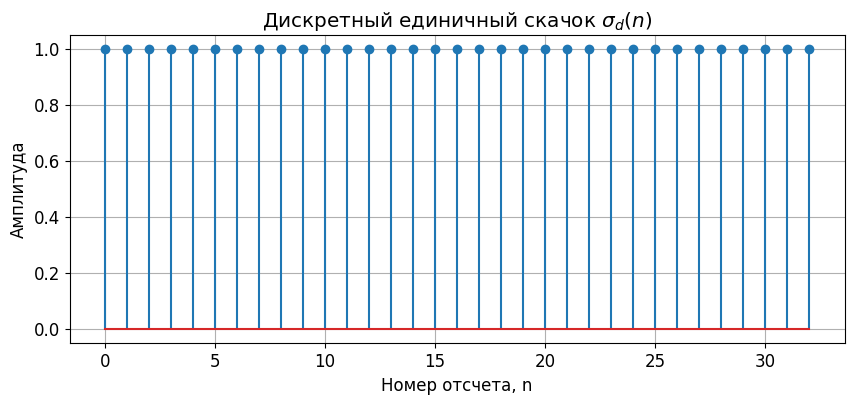

In [ ]:
# Дискретный единичный скачок
sigma_signal = [sigma_d(num) for num in range(N)]

plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['font.size'] = 12

# Дискретное время
plt.figure()
plt.stem(t_vector, sigma_signal)
plt.title(r'Дискретный единичный скачок $\sigma_d(nT)$')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

# Дискретное нормированное время
plt.figure()
plt.stem(n_vector, sigma_signal)
plt.title(r'Дискретный единичный скачок $\sigma_d(n)$')
plt.xlabel('Номер отсчета, n')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

# Пояснение

## Соответствие между дискретным и аналоговым единичными скачками

Дискретный единичный скачок $\sigma_d(n)$ является цифровым аналогом **аналоговой функции единичного скачка**, также известной как **функция Хевисайда** $\sigma(t)$.

*   **Аналоговый скачок $\sigma(t)$** — это кусочно-постоянная функция, её значение равно 0 для всех отрицательных $t$ и 1 для всех положительных $t$. Важной особенностью является неопределенность в точке разрыва $t=0$, где значение функции либо не определено, либо принимается равным 0.5.

*   **Дискретный скачок $\sigma_d(n)$** представляет собой последовательность отсчетов, взятых с аналоговой функции. Главное отличие в том, что в дискретном случае значение в нуле определено: $\sigma_d(0) = 1$. Таким образом, он представляет собой последовательность нулей, которая в момент $n=0$ скачком переходит в последовательность единиц.

## Чему равна частота дискретизации дискретного единичного скачка

Моделируемый сигнал, который был получен в результате дискретизации с заданным периодом $T$:

$$
T = 0.0015 \text{ с}
$$

Частота дискретизации $f_д$ является величиной, обратной периоду дискретизации:

$$
f_д = \frac{1}{T}
$$

Таким образом частота дискретизации:

$$
f_д = \frac{1}{0.0015} \approx 666.67 \text{ Гц}
$$

# Пункт №3

Смоделировать дискретную экспоненциальную функцию $s_1(k)$ с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$. Пояснить соответствие между дискретной и аналоговой экспонентами.

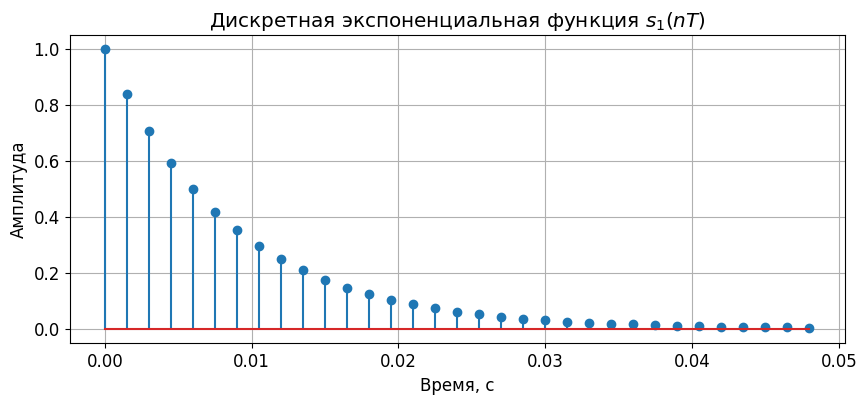

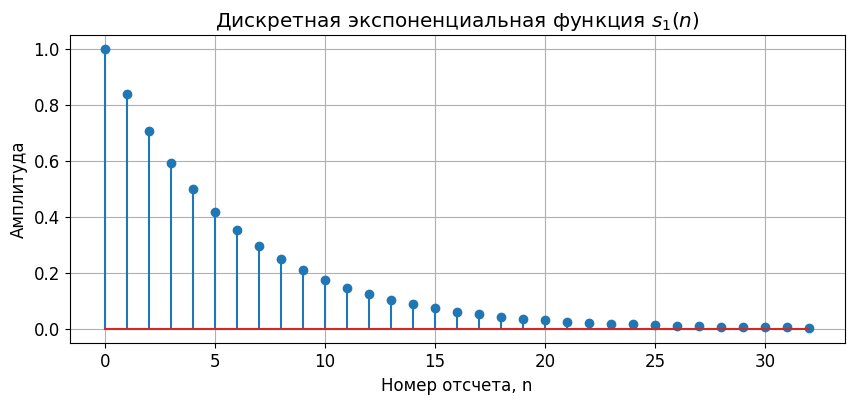

In [ ]:
# Дискретная экспоненциальная функция
s1_signal = [s1(num) for num in range(N)]

plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['font.size'] = 12

# Дискретное время
plt.figure()
plt.stem(t_vector, s1_signal)
plt.title(r'Дискретная экспоненциальная функция $s_1(nT)$')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

# Дискретное нормированное время
plt.figure()
plt.stem(n_vector, s1_signal)
plt.title(r'Дискретная экспоненциальная функция $s_1(n)$')
plt.xlabel('Номер отсчета, n')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

# Пояснение

## Соответствие между дискретной и аналоговой экспонентами

Дискретная экспоненциальная функция $s_1(k) = a^k$ является дискретным аналогом непрерывной (аналоговой) экспоненциальной функции вида $s(t) = e^{\alpha t}$.

Если взять отсчеты аналоговой экспоненты $s(t)$ в моменты времени $t=kT$, то получим:

$$
s(kT) = e^{\alpha (kT)} = (e^{\alpha T})^k
$$

Выражения эквивалентны, если положить основание $a = e^{\alpha T}$. Таким образом, дискретная экспонента представляет собой последовательность отсчетов, взятых с соответствующей аналоговой экспоненциальной функции.

# Пункт №4

Смоделировать дискретный комплексный гармонический сигнал $s_2(k)= C \exp(j\hat{\omega_0}k)$ с выводом графиков вещественной и мнимой частей на интервале времени $n \in [0,N−1]$. Записать данный сигнал в виде комбинации двух вещественных последовательностей.

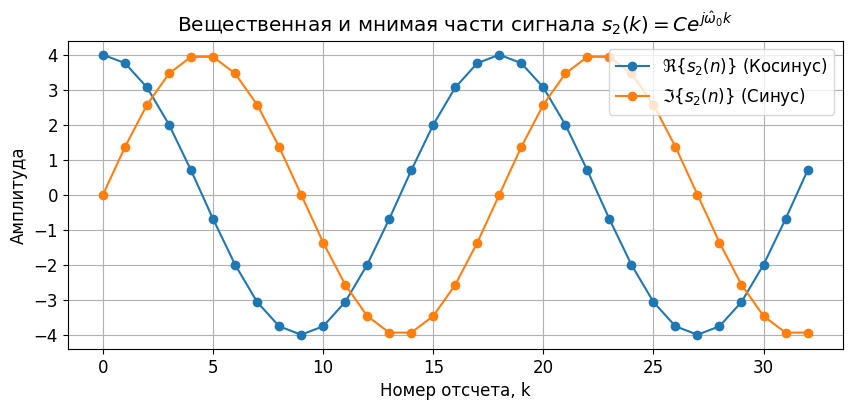

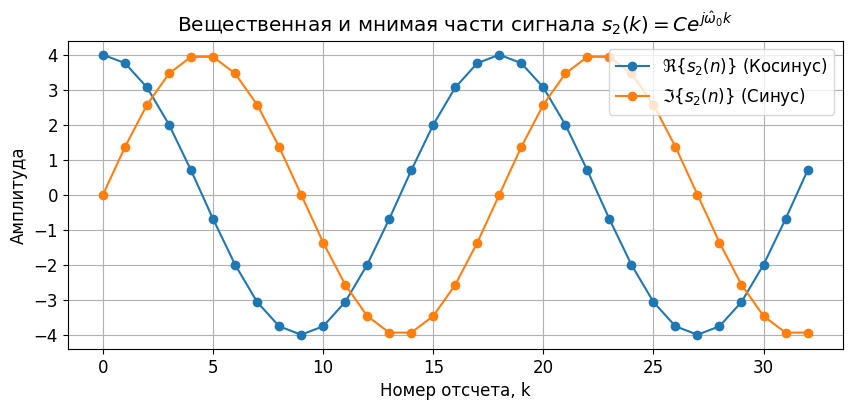

In [ ]:
# Дискретный комплексный гармонический сигнал
s2_signal = [s2(num) for num in range(N)]

# Вещественная и мнимые части
s2_real = [y.real for y in s2_signal]
s2_imag = [y.imag for y in s2_signal]

# Графики
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['font.size'] = 12

plt.figure()
plt.plot(n_vector, s2_real, 'o-', label=r'$\Re\{s_2(n)\}$ (Косинус)')
plt.plot(n_vector, s2_imag, 'o-', label=r'$\Im\{s_2(n)\}$ (Синус)')
plt.title(r'Вещественная и мнимая части сигнала $s_2(k)=C e^{j\hat{\omega}_0 k}$')
plt.xlabel('Номер отсчета, k')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)
plt.show()

# Проверка
s2_real = [s2_r(k) for k in range(N)]
s2_imag = [s2_i(k) for k in range(N)]

plt.figure()
plt.plot(n_vector, s2_real, 'o-', label=r'$\Re\{s_2(n)\}$ (Косинус)')
plt.plot(n_vector, s2_imag, 'o-', label=r'$\Im\{s_2(n)\}$ (Синус)')
plt.title(r'Вещественная и мнимая части сигнала $s_2(k)=C e^{j\hat{\omega}_0 k}$')
plt.xlabel('Номер отсчета, k')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)
plt.show()

# Запись сигнала

Дискретный комплексный гармонический сигнал определяется выражением:

$$
s_2(k) = C e^{j\hat{\omega}_0 k}
$$

По формуле Эйлера:

$$
e^{j\phi} = \cos(\phi) + j\sin(\phi) \\
s_2(k) = C (\cos(\hat{\omega}_0 k) + j\sin(\hat{\omega}_0 k)) = C\cos(\hat{\omega}_0 k) + j \cdot C\sin(\hat{\omega}_0 k)
$$

Таким образом, сигнал $s_2(k)$ можно представить как комбинацию двух вещественных последовательностей:

1.  **Вещественная часть:**
    $$ \Re\{s_2(k)\} = C\cos(\hat{\omega}_0 k) $$
2.  **Мнимая часть:**
    $$ \Im\{s_2(k)\} = C\sin(\hat{\omega}_0 k) $$

# Пункт №5

Вывести графики последовательностей $\delta_d(k)$, $\sigma_d(k)$ и $s_1(k)$, задержанных на m отсчетов, на интервале времени $n \in[0,N−1]$.
Записать формулы задержанных последовательностей.

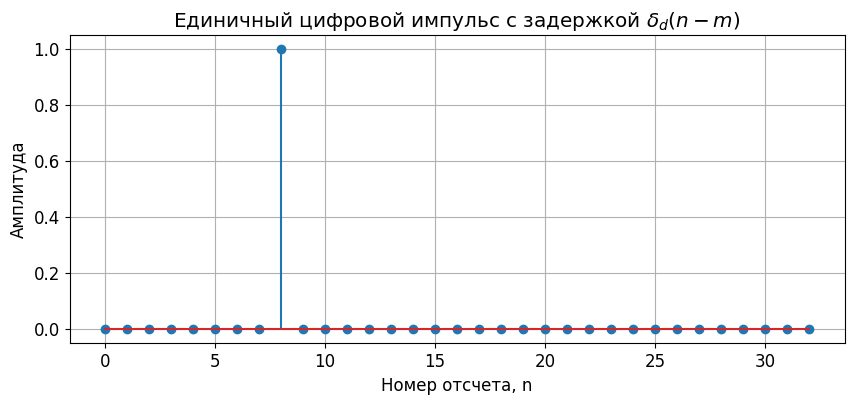

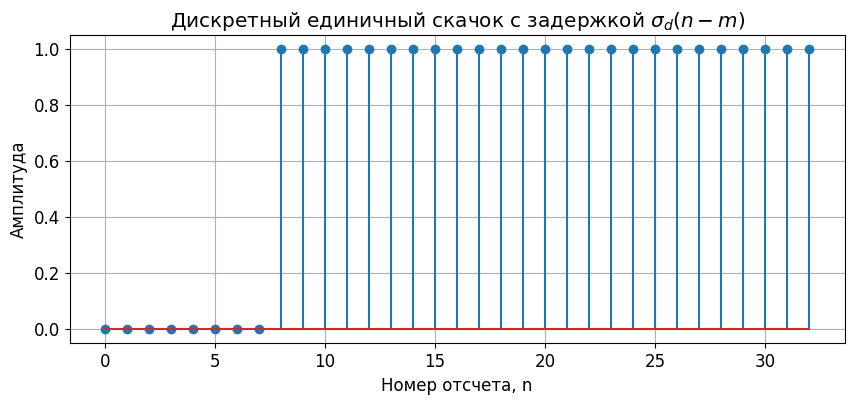

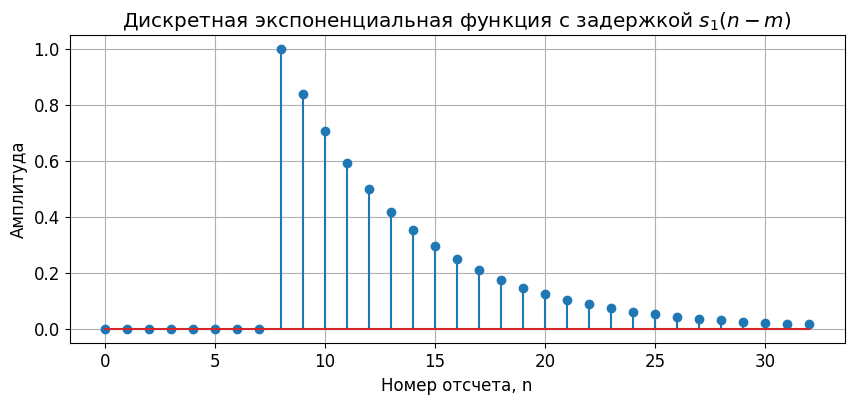

In [ ]:
# Единичный цифровой импульс с задержкой
delta_signal = [delta_d(n - m) for n in range(N)]

# Дискретный единичный скачок с задержкой
sigma_signal = [sigma_d(n - m) for n in range(N)]

# Дискретная экспоненциальная функция с задержкой
s1_signal = [s1(n - m) for n in range(N)]

plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['font.size'] = 12

# Дискретное нормированное время
plt.figure()
plt.stem(n_vector, delta_signal)
plt.title(r'Единичный цифровой импульс с задержкой $\delta_d(n - m)$')
plt.xlabel('Номер отсчета, n')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

# Дискретное нормированное время
plt.figure()
plt.stem(n_vector, sigma_signal)
plt.title(r'Дискретный единичный скачок с задержкой $\sigma_d(n - m)$')
plt.xlabel('Номер отсчета, n')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

# Дискретное нормированное время
plt.figure()
plt.stem(n_vector, s1_signal)
plt.title(r'Дискретная экспоненциальная функция с задержкой $s_1(n - m)$')
plt.xlabel('Номер отсчета, n')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

# Формулы задержанных последовательностей

1.  **Задержанный единичный цифровой импульс:**
$$
  \delta_d(k-m) = \begin{cases}
  1, & k = m \\
  0, & k \neq m
  \end{cases}
$$

2.  **Задержанный дискретный единичный скачок:**
$$
  \sigma_d(k-m) = \begin{cases}
  1, & k \ge m \\
  0, & k < m
  \end{cases}
$$

3.  **Задержанная дискретная экспоненциальная функция:**
$$
  s_1(k-m) = \begin{cases}
  a^{k-m}, & k \ge m \\
  0, & k < m
  \end{cases}
$$

## Выводы

В ходе выполнения данной лабораторной работы были изучены математические описания стандартных дискретных сигналов и освоены программные средства для их моделирования.

Были смоделированы и проанализированы следующие фундаментальные последовательности:
-   Единичный цифровой импульс ($\delta_d(k)$)
-   Дискретный единичный скачок ($\sigma_d(k)$)
-   Дискретная экспоненциальная функция ($s_1(k)$)
-   Дискретный комплексный гармонический сигнал ($s_2(k)$)

В процессе работы была продемонстрирована взаимосвязь между дискретным нормированным временем ($n$) и дискретным физическим временем ($nT$), а также ключевые различия между дискретными сигналами и их аналоговыми прототипами.

На примере комплексного сигнала было показано его разложение на вещественную и мнимую составляющие. Кроме того, была реализована и проанализирована задержка сигнала на $m$ отсчетов.